# Project: Investigating Kaggle's Soccer Dataset
## Introduction
This notebook is to investigate 3 business related questions from Kaggle's Soccer Dataset.<br>
One of the most impactful factors when it comes to the business of soccer teams is their ability to win matches. Therefore, all the 3 questions in this report are going to be related to that.<br>
<br>
## Package Importing

In [48]:
import sqlite3
import numpy as np
import matplotlib
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

## Data Wrangling
First, we need to establish the connection with the database.

In [3]:
conn = sqlite3.connect("database.sqlite")
c = conn.cursor()

### Data Cleaning
As the basic data inspection below shows, it seems that data cleaning is not needed on this report as the data related to the questions below is clean enough.
#### Matches Table

In [49]:
raw_matches = pd.read_sql_query('''
select id, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal 
from match''',conn)

In [50]:
raw_matches.head()

,id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,2008-08-16 00:00:00,492477,7947,9985,1,3


In [52]:
raw_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   date              25979 non-null  object
 2   match_api_id      25979 non-null  int64 
 3   home_team_api_id  25979 non-null  int64 
 4   away_team_api_id  25979 non-null  int64 
 5   home_team_goal    25979 non-null  int64 
 6   away_team_goal    25979 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ MB


No null entries in the matches table

In [53]:
raw_matches.describe()

,id,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938
std,7499.635658,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110
min,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000
25%,6495.500000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000
50%,12990.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000
75%,19484.500000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000
max,25979.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000


Looks like this is a pretty simple and straightforward table. It comprises some IDs in addition to the number of goals for each side of each of the matches. The goals range from 0 all the way to 10.
#### Team Table

In [58]:
if 'raw_matches' in globals():
    del raw_matches

raw_teams = pd.read_sql_query('''
select team_api_id, team_long_name 
from Team''',conn)

In [59]:
raw_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   team_api_id     299 non-null    int64 
 1   team_long_name  299 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


No null entries here either

In [60]:
raw_teams.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [61]:
raw_teams.team_long_name.nunique()

296

In [64]:
raw_teams.team_long_name.value_counts()

Widzew Łódź                     2
Royal Excel Mouscron            2
Polonia Bytom                   2
Korona Kielce                   1
Termalica Bruk-Bet Nieciecza    1
Górnik Łęczna                   1
Zawisza Bydgoszcz               1
Pogoń Szczecin                  1
Podbeskidzie Bielsko-Biała      1
Zagłębie Lubin                  1
Cracovia                        1
CF Os Belenenses                1
Piast Gliwice                   1
Jagiellonia Białystok           1
Arka Gdynia                     1
GKS Bełchatów                   1
Lech Poznań                     1
Odra Wodzisław                  1
FC Porto                        1
KRC Genk                        1
Lechia Gdańsk                   1
Trofense                        1
Portimonense                    1
S.C. Olhanense                  1
União de Leiria, SAD            1
CS Marítimo                     1
Naval 1° de Maio                1
CD Nacional                     1
Leixões SC                      1
SL Benfica    

In [66]:
raw_teams[raw_teams.team_long_name.duplicated(keep=False)]

,team_api_id,team_long_name
15,9996,Royal Excel Mouscron
24,274581,Royal Excel Mouscron
182,8031,Polonia Bytom
183,8020,Polonia Bytom
189,8244,Widzew Łódź
199,8024,Widzew Łódź


Looks like there are 3 teams each with 2 associated team_api_ids. However, this doesn't require any changes for now. A possible clean up would be to replace the duplicates while keeping only one of the IDs. However, that requires staying consistent with that in all of the following queries. I choose the first option (not changing anything) while being cautious not to miss any important conclusions.

#### Team Attributes Table

In [67]:
if 'raw_teams' in globals():
    del raw_teams

raw_team_attributes = pd.read_sql_query('''select team_api_id,
buildUpPlaySpeedClass
,buildUpPlayDribblingClass
,buildUpPlayPassingClass
,buildUpPlayPositioningClass
,chanceCreationPassingClass
,chanceCreationCrossingClass
,chanceCreationShootingClass
,chanceCreationPositioningClass
,defencePressureClass
,defenceAggressionClass
,defenceTeamWidthClass
,defenceDefenderLineClass 
from team_attributes''',conn)

In [68]:
raw_team_attributes.head()

,team_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,9930,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
2,9930,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
3,8485,Fast,Little,Long,Organised,Risky,Lots,Lots,Organised,Medium,Double,Wide,Cover
4,8485,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover


In [69]:
raw_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   team_api_id                     1458 non-null   int64 
 1   buildUpPlaySpeedClass           1458 non-null   object
 2   buildUpPlayDribblingClass       1458 non-null   object
 3   buildUpPlayPassingClass         1458 non-null   object
 4   buildUpPlayPositioningClass     1458 non-null   object
 5   chanceCreationPassingClass      1458 non-null   object
 6   chanceCreationCrossingClass     1458 non-null   object
 7   chanceCreationShootingClass     1458 non-null   object
 8   chanceCreationPositioningClass  1458 non-null   object
 9   defencePressureClass            1458 non-null   object
 10  defenceAggressionClass          1458 non-null   object
 11  defenceTeamWidthClass           1458 non-null   object
 12  defenceDefenderLineClass        1458 non-null   

In [78]:
lst_of_values = []

for col in raw_team_attributes.columns[1:]:
    print(col)
    print(raw_team_attributes.loc[:, col].value_counts())
    lst_of_values.extend(raw_team_attributes.loc[:, col].unique())

print('This is a list of all the values in this table')
print(set(lst_of_values))

buildUpPlaySpeedClass
Balanced    1184
Fast         172
Slow         102
Name: buildUpPlaySpeedClass, dtype: int64
buildUpPlayDribblingClass
Little    1004
Normal     433
Lots        21
Name: buildUpPlayDribblingClass, dtype: int64
buildUpPlayPassingClass
Mixed    1236
Short     128
Long       94
Name: buildUpPlayPassingClass, dtype: int64
buildUpPlayPositioningClass
Organised    1386
Free Form      72
Name: buildUpPlayPositioningClass, dtype: int64
chanceCreationPassingClass
Normal    1231
Risky      171
Safe        56
Name: chanceCreationPassingClass, dtype: int64
chanceCreationCrossingClass
Normal    1195
Lots       211
Little      52
Name: chanceCreationCrossingClass, dtype: int64
chanceCreationShootingClass
Normal    1224
Lots       197
Little      37
Name: chanceCreationShootingClass, dtype: int64
chanceCreationPositioningClass
Organised    1309
Free Form     149
Name: chanceCreationPositioningClass, dtype: int64
defencePressureClass
Medium    1243
Deep       154
High        61
N

This table looks clean with a very limited set of values and no missing values.
#### Player Table

In [79]:
if 'raw_team_attributes' in globals():
    del raw_team_attributes

raw_player = pd.read_sql_query('''select player_api_id, player_name 
from player''',conn)

In [80]:
raw_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   player_api_id  11060 non-null  int64 
 1   player_name    11060 non-null  object
dtypes: int64(1), object(1)
memory usage: 172.9+ KB


No missing values here either

In [82]:
raw_player.head()

,player_api_id,player_name
0,505942,Aaron Appindangoye
1,155782,Aaron Cresswell
2,162549,Aaron Doran
3,30572,Aaron Galindo
4,23780,Aaron Hughes


In [83]:
raw_player.player_name.nunique()

10848

In [84]:
raw_player[raw_player.player_name.duplicated(keep=False)]

,player_api_id,player_name
84,26331,Adailton
85,41749,Adailton
98,23133,Adam Drury
99,420209,Adam Drury
137,181211,Adama Traore
138,533212,Adama Traore
190,121923,Adriano
191,30690,Adriano
192,33992,Adriano
193,41109,Adriano


Looks like the duplicated IDs issue is here as well. However, the same approach is going to be followed here (as with the Teams Table)

#### Player Attributes Table

In [85]:
if 'raw_player' in globals():
    del raw_player


raw_player_attributes = pd.read_sql_query('''select player_api_id, penalties as Num_of_penalties 
  from player_attributes''',conn)

In [86]:
raw_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   player_api_id     183978 non-null  int64  
 1   Num_of_penalties  183142 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.8 MB


There are 836 missing values under the penalties column. They could mean that those values represent zeros. However, since there is no information on this column, the safer approach is to drop them (exclude them from relevant calculations).

In [87]:
raw_player_attributes.head()

,player_api_id,Num_of_penalties
0,505942,48.0
1,505942,48.0
2,505942,48.0
3,505942,47.0
4,505942,47.0


In [88]:
raw_player_attributes.Num_of_penalties.value_counts()

58.0    5150
64.0    5052
60.0    5049
62.0    4809
68.0    4725
54.0    4700
59.0    4653
56.0    4640
66.0    4535
65.0    4504
67.0    4412
55.0    4382
70.0    4187
63.0    4184
57.0    4146
61.0    4133
52.0    4122
51.0    4073
50.0    4039
69.0    3821
49.0    3798
48.0    3783
53.0    3757
72.0    3656
45.0    3433
46.0    3407
44.0    3304
47.0    3285
71.0    3263
73.0    3244
74.0    3170
42.0    3038
41.0    2872
43.0    2786
40.0    2643
75.0    2590
25.0    2413
76.0    2389
39.0    1987
36.0    1707
77.0    1656
35.0    1617
34.0    1610
38.0    1606
78.0    1592
37.0    1394
33.0    1356
80.0    1349
32.0    1278
31.0    1216
30.0    1157
21.0    1104
29.0    1089
22.0    1082
81.0    1009
79.0     984
82.0     966
23.0     950
24.0     889
27.0     871
28.0     842
26.0     803
84.0     688
83.0     590
20.0     568
85.0     517
14.0     402
12.0     374
86.0     373
13.0     372
16.0     366
18.0     338
11.0     308
19.0     274
17.0     268
15.0     264
87.0     245

In [91]:
raw_player_attributes[raw_player_attributes.isnull().any(axis=1)]

,player_api_id,Num_of_penalties
483,31684,NaN
983,29904,NaN
1752,24159,NaN
2089,31916,NaN
2482,37249,NaN
2498,40012,NaN
2540,38612,NaN
3283,41109,NaN
4006,23163,NaN
4202,32547,NaN


As suggested by the basic inspection above, all needed tables are clean. However, there are some missing values in the Player Attributes table which need to be accounted for when using the Penalties column.

## Exploratory Data Analysis
### What team attributes lead to the most victories?
There are 2 important tables, when addressing this question, namely, Match & Team_Attributes. However, the Match table contains the information in terms of the number of goals each team had on each match. However, for the purposes of answering this question, the team name and goal columns are summarized into a single column that reports the name of the winning team (ties are neglected).

In [4]:
# Load all matches from the database
matches = pd.read_sql_query('''
select id, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal 
from match''',conn)

# create an empty DataFrame to track wins
filtered_matches = pd.DataFrame(columns=['winner_team','date','id'])

# a variable used as an index/id for filtered_matches dataframe
new_row = 0

# wins tracking is done here...
for row in range(len(matches)):
    if matches['away_team_goal'][row] > matches['home_team_goal'][row]:
        filtered_matches = filtered_matches.append({'winner_team':matches['away_team_api_id'][row],
                                                    'date':matches['date'][row],
                                                    'id':new_row+1},ignore_index=True)
        new_row+=1
    if matches['away_team_goal'][row] < matches['home_team_goal'][row]:
        filtered_matches = filtered_matches.append({'winner_team':matches['home_team_api_id'][row],
                                                    'date':matches['date'][row],
                                                    'id':new_row+1}, ignore_index=True)
        new_row+=1
        
# display result
filtered_matches.head()

,winner_team,date,id
0,8635,2008-08-16 00:00:00,1
1,9991,2008-08-17 00:00:00,2
2,9985,2008-08-16 00:00:00,3
3,9996,2008-08-16 00:00:00,4
4,10001,2008-08-16 00:00:00,5


Then, the winnings are counted and displayed after sorting.

In [5]:
teams_winnings = filtered_matches.groupby(['winner_team'])['date'].count().sort_values(ascending=False)
teams_winnings

winner_team
8634      234
8633      228
9925      218
9823      193
10260     192
9885      189
9772      185
9773      183
8593      181
9931      180
8640      178
8455      176
9847      175
8456      175
9825      170
9906      167
8686      162
9789      157
8636      154
8564      154
9875      153
9748      153
8586      151
8650      150
8639      147
8611      144
9768      144
8592      143
10267     142
10192     142
10229     140
10235     139
8302      139
8673      137
8178      137
8635      136
8535      132
8543      131
10189     127
10264     126
9827      126
2182      124
8342      123
8315      122
9927      122
9853      121
8668      121
10243     120
8485      120
8721      117
9938      115
9956      115
8600      115
10205     112
9851      111
10249     110
9788      109
9991      109
8674      109
10265     108
8548      108
10228     107
9985      106
9864      106
10233     106
9831      106
9908      105
10199     105
8277      105
10179     104
9941    

It seems interesting to have a look at the distribution (histogram) of this metric. However, before we plot the distribution, we need to identify the top tier among those teams. There are multiple ways of selecting those teams. However, I have chosen to choose the top 5% (95-percentile).

In [6]:
# It seems that the cuttoff is 167 (the minimum number of wins to be in the top 5% tier).
# We will highlight this with the green box in the plot
np.percentile(teams_winnings, 95)

167.2999999999999

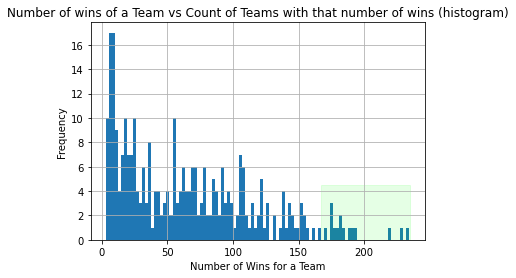

In [7]:
axes = teams_winnings.hist(bins=100);
plt.title('Number of wins of a Team vs Count of Teams with that number of wins (histogram)');
plt.xlabel('Number of Wins for a Team')
plt.ylabel('Frequency')
axes.axvspan(167, 235, ymax=0.25, alpha=0.1, color=(0,1,0));

Interesting enough! All that remains is to know the names of these top teams (highlighted in green). For that, we need to pull the appropriate mapping between team names and their associated ids.

In [8]:
teams = pd.read_sql_query('''
select team_api_id, team_long_name 
from Team''',conn)

In [9]:
# Create a separate dataframe for the top teams
most_winners = teams_winnings[teams_winnings>167].rename('most_winners').to_frame()

# Get the "Number of Wins" column
most_winners = most_winners.reset_index()

# trying to get the ranking of each team
most_winners.index = range(1, 1+len(most_winners.index))
most_winners= most_winners.reset_index()

# Fix columns names which were created from last 3 lines
most_winners.rename(columns={'index':'Rank','most_winners':'Number of Wins'},
                   inplace=True)

# Finaly, getting the teams names
most_winners_named = most_winners.merge(teams, how='left',
                   left_on='winner_team', right_on='team_api_id').drop('team_api_id',axis=1)

# reordering columns for readiblity
cols = most_winners_named.columns.to_list()
cols = cols[:2] + cols[:1:-1]
most_winners_named = most_winners_named[cols]

# Displaying Resulting Dataframe
display(most_winners_named)

,Rank,winner_team,team_long_name,Number of Wins
0,1,8634,FC Barcelona,234
1,2,8633,Real Madrid CF,228
2,3,9925,Celtic,218
3,4,9823,FC Bayern Munich,193
4,5,10260,Manchester United,192
5,6,9885,Juventus,189
6,7,9772,SL Benfica,185
7,8,9773,FC Porto,183
8,9,8593,Ajax,181
9,10,9931,FC Basel,180


In [24]:
most_winners_named.iloc[:,[0,2,3]]

,Rank,team_long_name,Number of Wins
0,1,FC Barcelona,234
1,2,Real Madrid CF,228
2,3,Celtic,218
3,4,FC Bayern Munich,193
4,5,Manchester United,192
5,6,Juventus,189
6,7,SL Benfica,185
7,8,FC Porto,183
8,9,Ajax,181
9,10,FC Basel,180


As clearly stated above, the team with the greatest number of wins is FC Bercelona followed by Real Madrid CF and then Celtics.

### What are the most contributing-to-wins attributes?
As for the Team_Attributes table, the attributes addressed in this question are only the categorical attributes (contains the word "class" in the column title). This step was done to simplify calculations. Otherwise, the other numeric attributes can be quantized as well. The idea is simply to count the number a given attribute was found in a winning team (winning teams are found above). Since several attributes share some commen values, a simple trick needs to be performed first. Each cell in the Team_Attributes table is going to be transformed as the following: < Column Title > : < Cell Content >, as shown below:

In [10]:
'''This cell exemplifies what the add_column function is aiming to accomplish.
Given a pandas.Series (in this example is the column "A"), we are trying
to produce a series where each element conforms to the following format:
"A:element"
where A is the column title and element is the content of the element from 
column A'''
df = pd.DataFrame(data={'A':['a','b','c','a'],
                       'B':['b','c','d','e']})
display(df)
display(df['A'].name+':'+df['A'])

,A,B
0,a,b
1,b,c
2,c,d
3,a,e


0    A:a
1    A:b
2    A:c
3    A:a
Name: A, dtype: object

This is going to be done by the help of the following function through the DataFrame.apply function

In [11]:
def add_column(mdf):
    '''Takes in a pandas.Series mdf,
    returns another Series where each element is replaced by the following
    from the input series:
    column_title:element_value'''
    return mdf.name + ':' + mdf

In [12]:
df.apply(add_column)

,A,B
0,A:a,B:b
1,A:b,B:c
2,A:c,B:d
3,A:a,B:e


So, going back to our question, the first step is to load the categorical attributes from Team_Attributes table

In [13]:
team_attributes = pd.read_sql_query('''select team_api_id,
buildUpPlaySpeedClass
,buildUpPlayDribblingClass
,buildUpPlayPassingClass
,buildUpPlayPositioningClass
,chanceCreationPassingClass
,chanceCreationCrossingClass
,chanceCreationShootingClass
,chanceCreationPositioningClass
,defencePressureClass
,defenceAggressionClass
,defenceTeamWidthClass
,defenceDefenderLineClass 
from team_attributes''',conn)

Then, keep only the teams which meet the winning criterion specified above (in this case it is redundant as all the teams have won at least 1 match).

In [14]:
winner_team_attributes = team_attributes[team_attributes['team_api_id'].isin(filtered_matches['winner_team'])]
winner_team_attributes.head()

,team_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,9930,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
2,9930,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
3,8485,Fast,Little,Long,Organised,Risky,Lots,Lots,Organised,Medium,Double,Wide,Cover
4,8485,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover


The team_api_id column is no longer needed for the attribute counting procedure, so it is deleted.

In [16]:
winner_team_attributes = winner_team_attributes.drop(['team_api_id'],axis=1)
winner_team_attributes.head()

,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
2,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
3,Fast,Little,Long,Organised,Risky,Lots,Lots,Organised,Medium,Double,Wide,Cover
4,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover


The aforementioned transformation is applied.

In [18]:
winner_team_attributes_transformed = winner_team_attributes.apply(add_column)
winner_team_attributes_transformed.head()

,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,buildUpPlaySpeedClass:Balanced,buildUpPlayDribblingClass:Little,buildUpPlayPassingClass:Mixed,buildUpPlayPositioningClass:Organised,chanceCreationPassingClass:Normal,chanceCreationCrossingClass:Normal,chanceCreationShootingClass:Normal,chanceCreationPositioningClass:Organised,defencePressureClass:Medium,defenceAggressionClass:Press,defenceTeamWidthClass:Normal,defenceDefenderLineClass:Cover
1,buildUpPlaySpeedClass:Balanced,buildUpPlayDribblingClass:Normal,buildUpPlayPassingClass:Mixed,buildUpPlayPositioningClass:Organised,chanceCreationPassingClass:Normal,chanceCreationCrossingClass:Normal,chanceCreationShootingClass:Normal,chanceCreationPositioningClass:Organised,defencePressureClass:Medium,defenceAggressionClass:Press,defenceTeamWidthClass:Normal,defenceDefenderLineClass:Cover
2,buildUpPlaySpeedClass:Balanced,buildUpPlayDribblingClass:Normal,buildUpPlayPassingClass:Mixed,buildUpPlayPositioningClass:Organised,chanceCreationPassingClass:Normal,chanceCreationCrossingClass:Normal,chanceCreationShootingClass:Normal,chanceCreationPositioningClass:Organised,defencePressureClass:Medium,defenceAggressionClass:Press,defenceTeamWidthClass:Normal,defenceDefenderLineClass:Cover
3,buildUpPlaySpeedClass:Fast,buildUpPlayDribblingClass:Little,buildUpPlayPassingClass:Long,buildUpPlayPositioningClass:Organised,chanceCreationPassingClass:Risky,chanceCreationCrossingClass:Lots,chanceCreationShootingClass:Lots,chanceCreationPositioningClass:Organised,defencePressureClass:Medium,defenceAggressionClass:Double,defenceTeamWidthClass:Wide,defenceDefenderLineClass:Cover
4,buildUpPlaySpeedClass:Balanced,buildUpPlayDribblingClass:Little,buildUpPlayPassingClass:Mixed,buildUpPlayPositioningClass:Organised,chanceCreationPassingClass:Normal,chanceCreationCrossingClass:Normal,chanceCreationShootingClass:Normal,chanceCreationPositioningClass:Organised,defencePressureClass:Medium,defenceAggressionClass:Press,defenceTeamWidthClass:Normal,defenceDefenderLineClass:Cover


Then, the final step is to count all the occurences of each attribute and display the sorted result.

buildUpPlayPositioningClass:Organised       1386
defenceDefenderLineClass:Cover              1362
chanceCreationPositioningClass:Organised    1309
defenceTeamWidthClass:Normal                1286
defenceAggressionClass:Press                1274
defencePressureClass:Medium                 1243
buildUpPlayPassingClass:Mixed               1236
chanceCreationPassingClass:Normal           1231
chanceCreationShootingClass:Normal          1224
chanceCreationCrossingClass:Normal          1195
buildUpPlaySpeedClass:Balanced              1184
buildUpPlayDribblingClass:Little            1004
buildUpPlayDribblingClass:Normal             433
chanceCreationCrossingClass:Lots             211
chanceCreationShootingClass:Lots             197
buildUpPlaySpeedClass:Fast                   172
chanceCreationPassingClass:Risky             171
defencePressureClass:Deep                    154
chanceCreationPositioningClass:Free Form     149
buildUpPlayPassingClass:Short                128
defenceTeamWidthClas

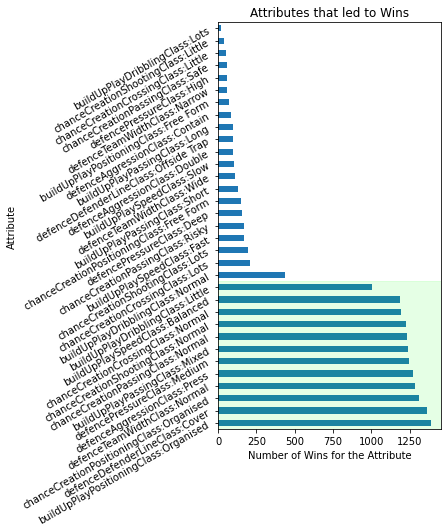

In [19]:
combined = winner_team_attributes_transformed.stack().reset_index(drop = True).value_counts()
display(combined);
axes = combined.plot.barh()
plt.title('Attributes that led to Wins')
plt.xlabel('Number of Wins for the Attribute')
plt.ylabel('Attribute')

plt.setp(axes.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.gcf().canvas.draw()

# the following code snippet is based on this link
# https://stackoverflow.com/questions/44863375/how-to-change-spacing-between-ticks-in-matplotlib
N,m = len(combined.index), 1.8 # num_of_labels, margin in inches
tl = plt.gca().get_yticklabels()
maxsize = max([t.get_window_extent().height for t in tl])
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[1]


plt.gcf().subplots_adjust(bottom=margin, top=1.-margin)
plt.gcf().set_size_inches(plt.gcf().get_size_inches()[1],s)

axes.axhspan(-0.5,11.5, alpha=0.1, color='#00ff00');

One can see from the table above that there is a cutoff below attributes that were counted 1000 times. In other words, these are the attributes that led to the most victories: (sorted)

* buildUpPlayPositioningClass:Organised
* defenceDefenderLineClass:Cover
* chanceCreationPositioningClass:Organised
* defenceTeamWidthClass:Normal
* defenceAggressionClass:Press
* defencePressureClass:Medium
* buildUpPlayPassingClass:Mixed
* chanceCreationPassingClass:Normal
* chanceCreationShootingClass:Normal
* chanceCreationCrossingClass:Normal
* buildUpPlaySpeedClass:Balanced
* buildUpPlayDribblingClass:Little

### Which players had the most penalties?
Penalties can be decisive to certain matches. Threefore, it is interesting to have a look at that.<br> 
This question is quite simpler than the previous one. First, one needs to sum the number of penalties under each player which can be found in the Player_Attributes table. Then, a simple query is done to replace the player IDs with their proper names.

In [25]:
player_penalties = pd.read_sql_query('''
select player.player_name, Num_of_penalties 
from player, 
  (select player_api_id, penalties as Num_of_penalties 
  from player_attributes 
  order by Num_of_penalties desc) as sum_table
where player.player_api_id = sum_table.player_api_id''',conn)

In [45]:
player_penalties.Num_of_penalties = player_penalties.Num_of_penalties.fillna(0)
player_penalties.drop_duplicates(subset='player_name', keep='first', inplace=True)
player_penalties = player_penalties.loc[:, ['player_name','Num_of_penalties']]
player_penalties.index = range(1, len(player_penalties.index)+1)

player_penalties.head()

,player_name,Num_of_penalties
1,Rickie Lambert,96.0
2,Andrea Pirlo,95.0
3,Mario Balotelli,95.0
4,Paul Scholes,95.0
5,Xavi Hernandez,95.0


This table shows player names and the number of penalties they had. As can be seen the player with most penalties is Rickie Lambert with a total of 96 penalties.

The 5th and 95th percentiles are: 34.0 and 82.0


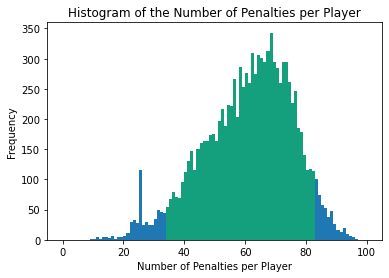

In [46]:
# 5th and 95th percentiles of pentalties
p_5,p_95 = np.percentile(player_penalties.Num_of_penalties, [5,95])
print(f'The 5th and 95th percentiles are: {p_5} and {p_95}')
# Selecting most penalties and adding a column in dataframe for that
most_penalties_filter = lambda x: x if p_5<=x<=p_95 else np.nan
player_penalties['most_penalties'] = player_penalties.Num_of_penalties.apply(most_penalties_filter)

# Plotting both histograms
bins = np.linspace(0,100,101);

# # This particular line is done to align our filtering criterion (5th and 95th percentile with bins)
# bins[17], bins[212] = p_5, p_95

plt.hist(player_penalties.Num_of_penalties,bins);
plt.hist(player_penalties.most_penalties,bins, color=(0,1,0), alpha=0.3);
plt.title('Histogram of the Number of Penalties per Player')
plt.xlabel('Number of Penalties per Player')
plt.ylabel('Frequency')
plt.show()

It seems that most of the players had between 34 and 82 penalties

In [47]:
player_penalties[['player_name', 'Num_of_penalties']].head(10)

,player_name,Num_of_penalties
1,Rickie Lambert,96.0
2,Andrea Pirlo,95.0
3,Mario Balotelli,95.0
4,Paul Scholes,95.0
5,Xavi Hernandez,95.0
6,Adrian Mutu,94.0
7,Cesc Fabregas,94.0
8,David Trezeguet,94.0
9,Fabio Cannavaro,94.0
10,Iker Casillas,94.0


while the top 5 players with most penalties are: Rickie Lambert, Andrea Pirlo, Mario Balotelli, Paul Scholes, Xavi Hernandez	

## Conclusion
To sum up the result, here is a quick list of the report's observations:
<ol>
    <li> We have discovered that the team with most winnings is FC Bercelona followed by Real Madrid CF and then Celtics. This information could be very useful to advertising companies.<br></li>
<br>
<li> Also, we learned that some of the most attributes for winnings are:

* buildUpPlayPositioningClass:Organised
* defenceDefenderLineClass:Cover
* chanceCreationPositioningClass:Organised

This information can guide team coaches in creating their optimal training routines<br></li>
<li> We also learned that the top five players with most penalties are: 
    
* Rickie Lambert
* Andrea Pirlo
* Mario Balotelli
* Paul Scholes
* Xavi Hernandez

The personal routine of these players could be valuable information for coaches and other aspiring players<br></li>

## Limitations
There are several limitations to this work. First, the logic while seemingly sound is a bit simplistic. Also, it could have benefited from a more specific segmentation e.g. per league. Third, it doesn't take into account the time factor where players may change behaviour. Another problem with time is that, for example, when considering the number of penalties question, we ignored the length of time the player has been playing (e.g. 1 year vs 5 years).